In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
labels = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]

In [3]:
df = pd.read_csv('processed.cleveland.data', names=labels)

In [4]:
df

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   
302  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope   ca thal  num  
0      3.0  0.0  6.0    0  
1      2.0  3.0  3.0    2  
2      2.0  2.0  7.0    1  
3      3.0  0.0  3.0    0  
4      1.0  0.0  3.0    0  
..     ...  ...  ...  ...  
298    2.0  0.0  7.0    1  
299    2.0  2.0  7.0    2  
300    2.0  1.0  7.0    3  
301    2.0  1.0  3.0    1  
302    1.0    ?  3.0    0  

[303 rows x 14 columns]

In [5]:
# we have some ? values in there
(df == '?').sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [6]:
# replace ? with NN neighbors

from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=3)
df.replace('?', None, inplace=True)
imputer = knn_imputer
df = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)
# check if these values are different
(df == '?').sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [7]:
df

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   
302  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope   ca  thal  num  
0      3.0  0.0   6.0  0.0  
1      2.0  3.0   3.0  2.0  
2      2.0  2.0   7.0  1.0  
3      3.0  0.0   3.0  0.0  
4      1.0  0.0   3.0  0.0  
..     ...  ...   ...  ...  
298    2.0  0.0   7.0  1.0  
299    2.0  2.0   7.0  2.0  
300    2.0  1.0   7.0  3.0  
301    2.0  1.0   3.0  1.0  
302    1.0  0.0   3.0  0.0  

[303 rows x 14 columns]

In [8]:
y = df.iloc[:,13]

In [9]:
X = df.iloc[:,0:13]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3399, random_state = 9001)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# used a grid search to find these values below 
model = LogisticRegression(C=0.041,solver="newton-cg")
model.fit(X_train_scaled, y_train)

LogisticRegression(C=0.041, solver='newton-cg')

In [12]:
# 5a coefficients
model.coef_

array([[-0.05329812, -0.15363554, -0.29305536, -0.12244564, -0.05435122,
         0.04284423, -0.13343981,  0.17843146, -0.27705232, -0.25148127,
        -0.14009438, -0.47060145, -0.41242319],
       [-0.04665391,  0.02661995,  0.01733389,  0.01035703, -0.05553441,
        -0.15454972,  0.11346785, -0.01754572,  0.08133246, -0.21276887,
        -0.04029463, -0.04825178,  0.11306934],
       [ 0.03286621,  0.03026732,  0.06966646,  0.00189149,  0.15826022,
         0.02895157, -0.11942562, -0.06486731,  0.18624693,  0.03739885,
         0.04520746,  0.08885941,  0.10128282],
       [-0.03101847, -0.00322206,  0.15314145,  0.09289806, -0.0736191 ,
         0.12480975,  0.03359318, -0.13101187,  0.07205697,  0.19030102,
         0.02495955,  0.27369311,  0.13444964],
       [ 0.09810428,  0.09997033,  0.05291356,  0.01729907,  0.0252445 ,
        -0.04205583,  0.1058044 ,  0.03499343, -0.06258404,  0.23655028,
         0.110222  ,  0.15630072,  0.06362139]])

In [13]:
coef = np.mean(np.abs(model.coef_), axis=0)

In [14]:
coef

array([0.0523882 , 0.06274304, 0.11722215, 0.04897826, 0.07340189,
       0.07864222, 0.10114617, 0.08536996, 0.13585454, 0.18570006,
       0.07215561, 0.20754129, 0.16496928])

In [15]:
# 5a most influencial features
most = coef.argsort()[-3:]
result = [labels[i] for i in most]
result

['thal', 'oldpeak', 'ca']

In [16]:
# 5b test error rate
guess = model.predict(X_test_scaled)
1 - (guess == y_test).sum() / len(guess)

0.41747572815533984

In [17]:
# 5c 5-fold cross validation

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=9001)
1 - cross_val_score(model, X_train_scaled, y_train, cv=kf).mean()

0.4149999999999999

In [18]:
# 6a
def stepwise_forward_function(X, y, k=0): 
    
    scaler = StandardScaler()
    df_scaled  = scaler.fit_transform(X)
    X = pd.DataFrame(df_scaled, columns=X.columns, index=X.index)

    selected_features = []
    current_features = X.columns.to_list()
    for i in range(0,k):
        error_rates = []
        for trial in current_features:
            trial_features = selected_features + [trial]
            model = LogisticRegression(penalty='l1', solver='liblinear').fit(X[trial_features], y)
            
            kf = KFold(n_splits=5, shuffle=True, random_state=9001)
            error_rates.append(1 - cross_val_score(model, X[trial_features], y, cv=kf).mean())
                    
        best_feature = current_features[np.argmin(error_rates)]
        selected_features.append(best_feature)
        current_features.remove(best_feature)
    
    return selected_features 

In [19]:
X_train_scaled_df = df = pd.DataFrame(X_train_scaled, columns=labels[:-1])
X_test_scaled_df = df = pd.DataFrame(X_test_scaled, columns=labels[:-1])

In [20]:
sparse = []
error = []
fold_error = []
for i in range(1,14):
    sparse.append(stepwise_forward_function(X,y,i))
    
for i in range(0,13):
    model.fit(X_train_scaled_df[sparse[i]], y_train)
    guess = model.predict(X_test_scaled_df[sparse[i]])
    error.append( 1 - (guess == y_test).sum() / len(guess))
    kf = KFold(n_splits=5, shuffle=True, random_state=9001)
    fold_error.append(1 - cross_val_score(model, X_train_scaled_df[sparse[i]], y_train, cv=kf).mean())


In [21]:
import matplotlib.pyplot as plt

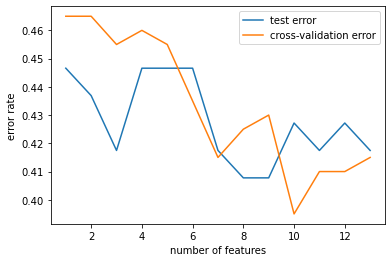

In [22]:
k_values = range(1, 14)
plt.plot(k_values, error, label='test error')
plt.plot(k_values,fold_error, label='cross-validation error')
plt.legend()
plt.xlabel('number of features')
plt.ylabel('error rate')
plt.show()

In [23]:
#6b
selected_features = stepwise_forward_function(X,y,2)
selected_features

['oldpeak', 'age']